# CAN data Analysis using `strym`

In this notebook, we will analyze data rates throughput and the timeseries characteristics of certain CAN message collected from Toyota RAV4 using Giraffee connector and Panda.

## Installing `strym`
First, we are required to install `strym`. For that, we will just use github devtools functionality.
Even if you have installed `strym` previously, you should reinstall for latest version of the package.

In [6]:
# Installing strym using pip from git
!pip install --upgrade --no-deps --force-reinstall git+https://github.com/jmscslgroup/strym

  Cloning https://github.com/jmscslgroup/strym to /private/var/folders/qb/xzd2v2fn741b459s8jvfjhk4000zl1/T/pip-req-build-iiq8oupt
  Running command git clone -q https://github.com/jmscslgroup/strym /private/var/folders/qb/xzd2v2fn741b459s8jvfjhk4000zl1/T/pip-req-build-iiq8oupt
  Created wheel for strym: filename=strym-0.1-cp37-none-any.whl size=19497 sha256=96cb43928d3d45e7949975bd166870c529bb61f10d045910005c2fef2e59f4f1
  Stored in directory: /private/var/folders/qb/xzd2v2fn741b459s8jvfjhk4000zl1/T/pip-ephem-wheel-cache-vpawynt7/wheels/16/8c/7f/7ab5f7b26c83fdbe3972de24a6aeb113cf4a35c9125d065c9d
Successfully built strym
  Found existing installation: strym 0.1
    Uninstalling strym-0.1:
      Successfully uninstalled strym-0.1


## Importing packages
Import required packages

In [1]:
from strym import strymread
import strym
import matplotlib.pyplot as plt
import numpy as np

## Specify Data Location

In [4]:
datafolder = "/Users/sprinkle/work/research/circles/cyverse/2020_03_03/"
import glob
csvlist = glob.glob(datafolder+"*.csv")

In [5]:
num_of_files = len(csvlist)
print("Total number of datafiles in {} is {}.".format(datafolder, num_of_files))

Total number of datafiles in /Users/sprinkle/work/research/circles/cyverse/2020_03_03/ is 7.


## Analysis
### 1. CSV file containing all messages
In this section, we will analyze CSV-formatted CAN Data for data throughput, rates and data distribution.

In [6]:
dbcfile = '../examples/newToyotacode.dbc'
r0 = strymread(csvfile=csvlist[0], dbcfile=dbcfile)

### First plot the count statistics of CAN messages

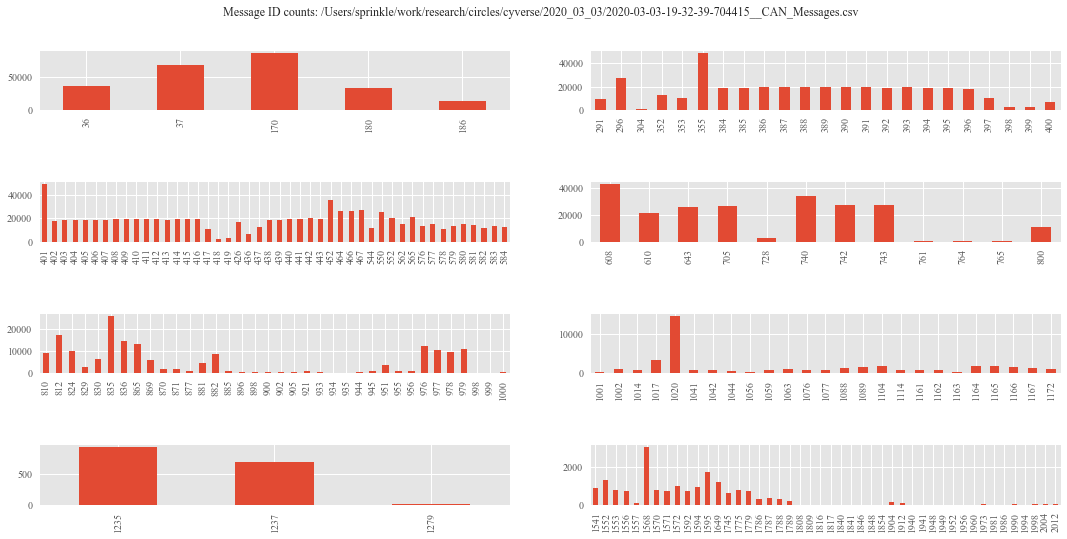

In [7]:
r0.count()

As you can see this particular csv file recorded all messages.

### Plot the speed as timeseries data

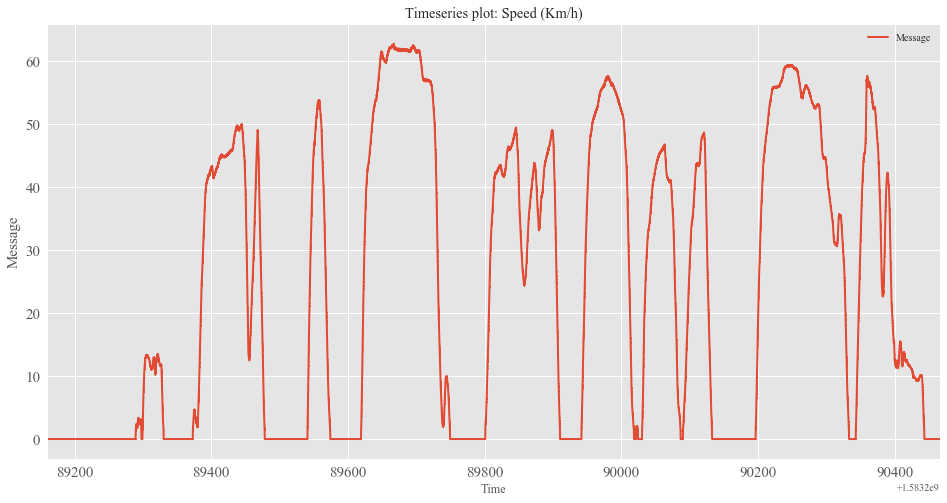

In [8]:
speed = r0.ts_speed()
strym.plt_ts(speed, title="Speed (Km/h)")

### Create Violin plot and box plot to see distribution of speed data

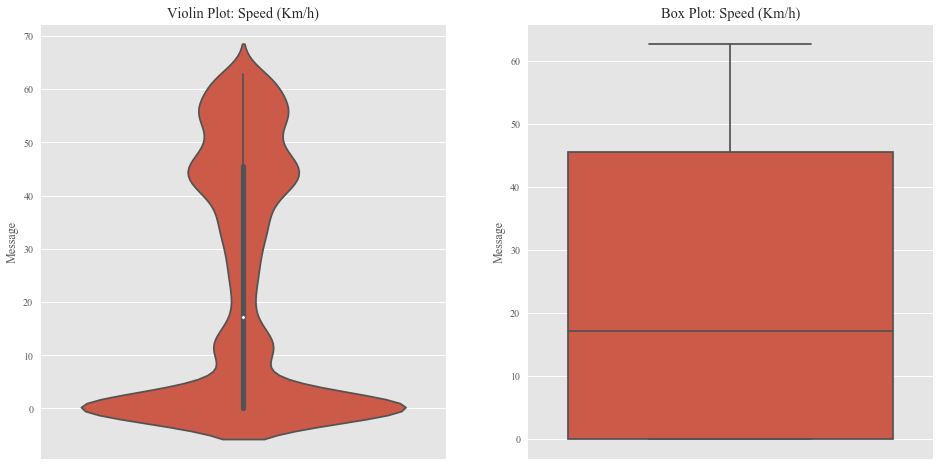

In [9]:
# violin plot of speed data
strym.violinplot(speed["Message"], title="Speed (Km/h)")

From the violin plot and box plot, we see that data is bimodal with majority of values around 0 km/h or above 40 km/h. Mean is around 20 km/h. It will be interesting to check the characteristics of violin plot for stop-and-go traffic.

### Rate analysis of speed data
We can analyse data throughput of speed data by measuring some statistical characterisitcs of time differences and instantaneous frequency.

Analyzing Timestamp and Data Rate of Speed Data
Interquartile Range of Rate for Speed Data is 24.922618018171253 


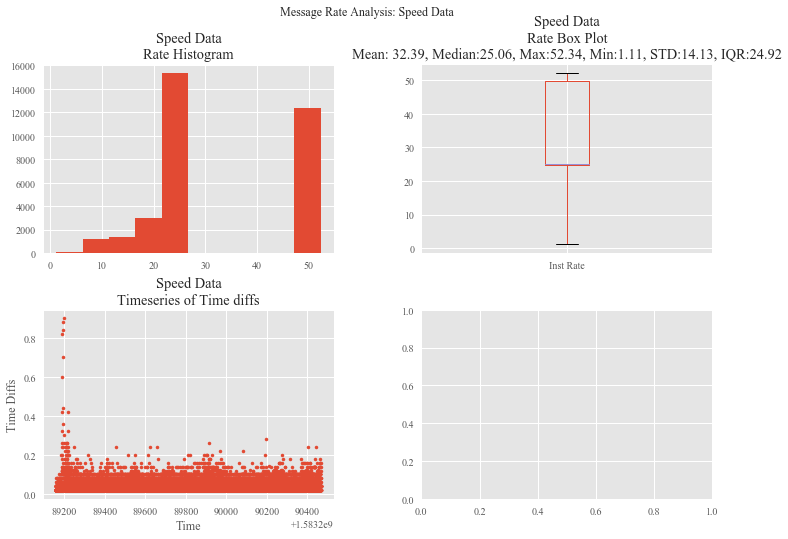

In [10]:
strym.ranalyze(speed, title='Speed Data')

from above 2x2 plot, we see that speed data came at 50 Hz a little more than half of instances and at 25Hz for little less than half of instances. From box plot, we see that mean data rate is 34.67 Hz and inter-quartile range is 25.05 Hz.  3rd plot is timeseries of time-diffs. Arrival of most of the data has time-difference below 0.05 for most part and some datapoints have arrival interval of more than 0.15 seconds.

### Rate analysis of RADAR traces: TRACK A 0

Analyzing Timestamp and Data Rate of Longitudinal Distance Data: TRACK A 0
Interquartile Range of Rate for Longitudinal Distance Data: TRACK A 0 is 10.07519528527621 


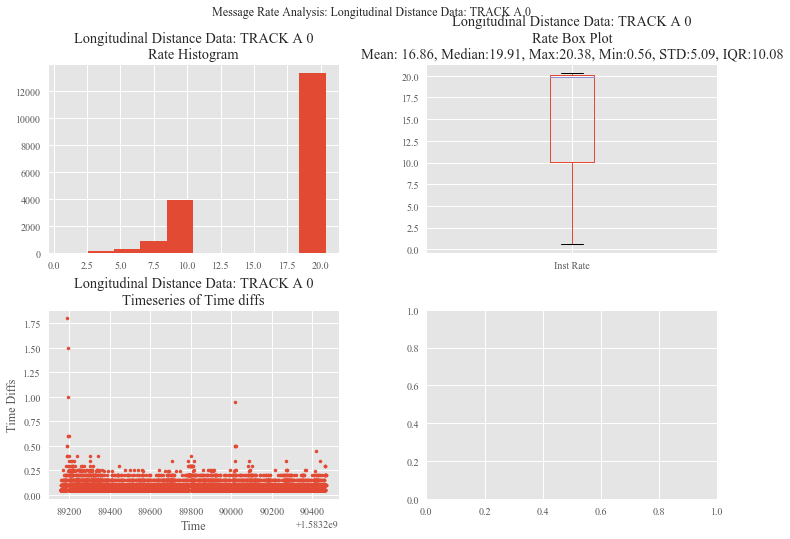

In [11]:
track_id = np.arange(0, 1) # I want to analyze rate for TRACK_A_0 only
long_dist = r0.ts_long_dist(track_id)

strym.ranalyze(long_dist, title='Longitudinal Distance Data: TRACK A 0')

From above plot, we see that most of the RADAR traces arrive at 20 Hz.

### 2. CSV file TRACK_A_0 only

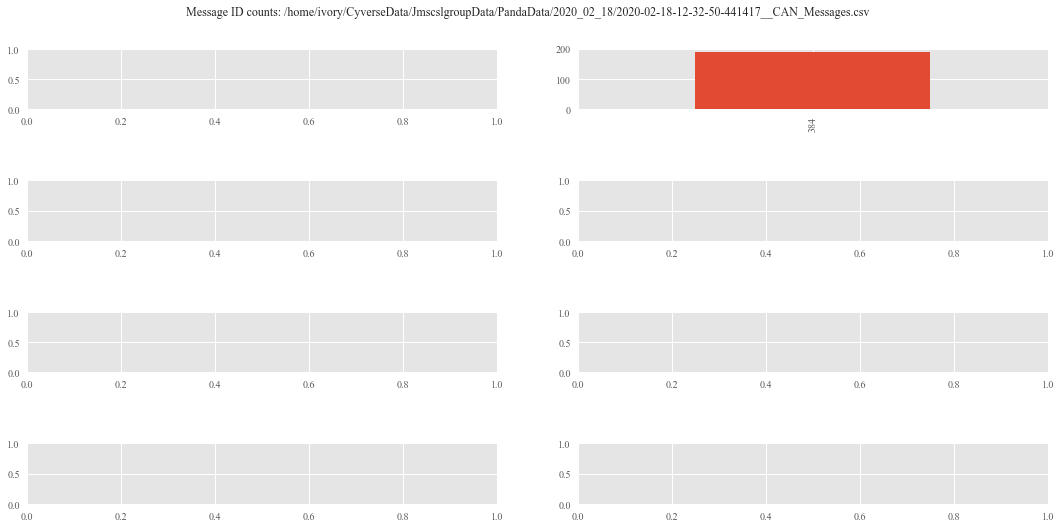

In [11]:
r2 = strymread(csvfile=csvlist[2], dbcfile=dbcfile)
r2.count()

Analyzing Timestamp and Data Rate of Longitudinal Distance Data: TRACK A 0
Interquartile Range of Rate for Longitudinal Distance Data: TRACK A 0 is 1.9325979545360488 


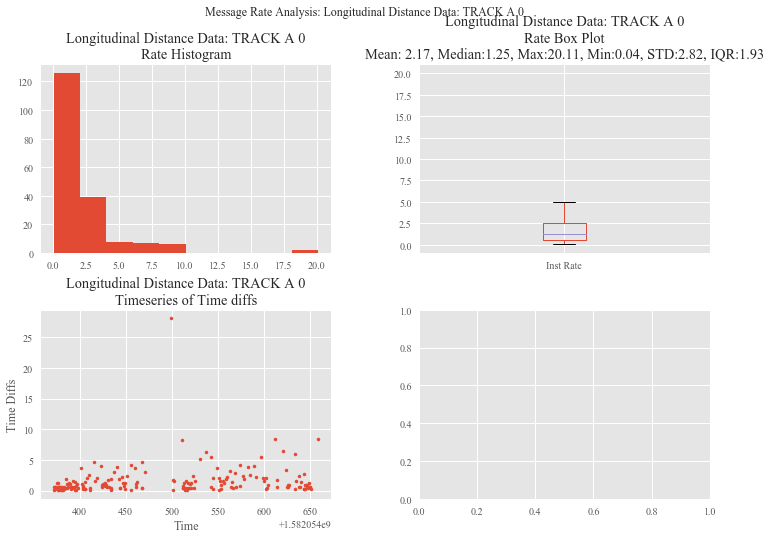

In [12]:
track_id = np.arange(0, 1) # I want to analyze rate for TRACK_A_0 only
long_dist = r2.ts_long_dist(track_id)

strym.ranalyze(long_dist, title='Longitudinal Distance Data: TRACK A 0')

I remember, while doing this run, we didn't receive data from TRAC A 0 much

### 3. CSV file TRACK_B_0 only

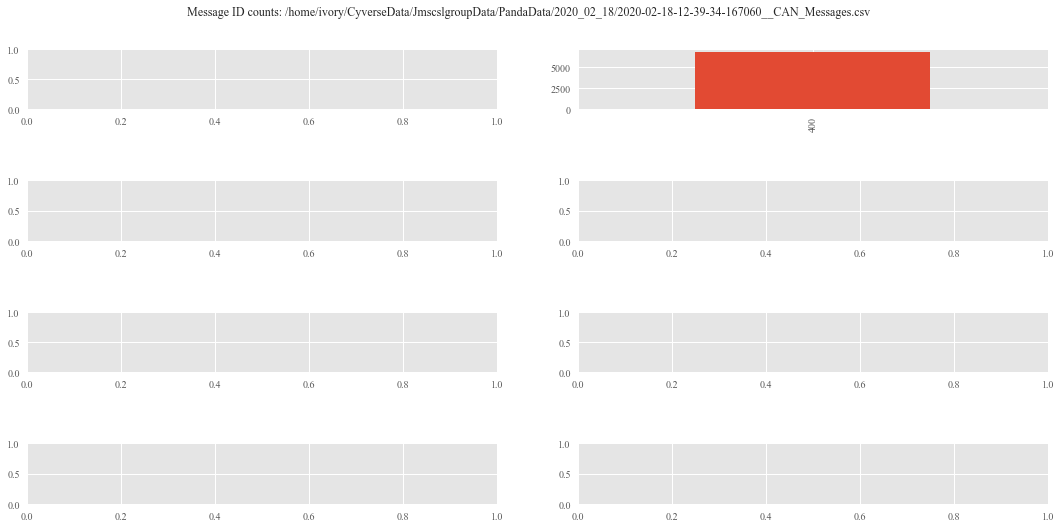

In [13]:
r4 = strymread(csvfile=csvlist[4], dbcfile=dbcfile)
r4.count()

Analyzing Timestamp and Data Rate of Relative Acceleration Data of Detected Object: TRACK B 0
Interquartile Range of Rate for Relative Acceleration Data of Detected Object: TRACK B 0 is 0.26235455159382326 


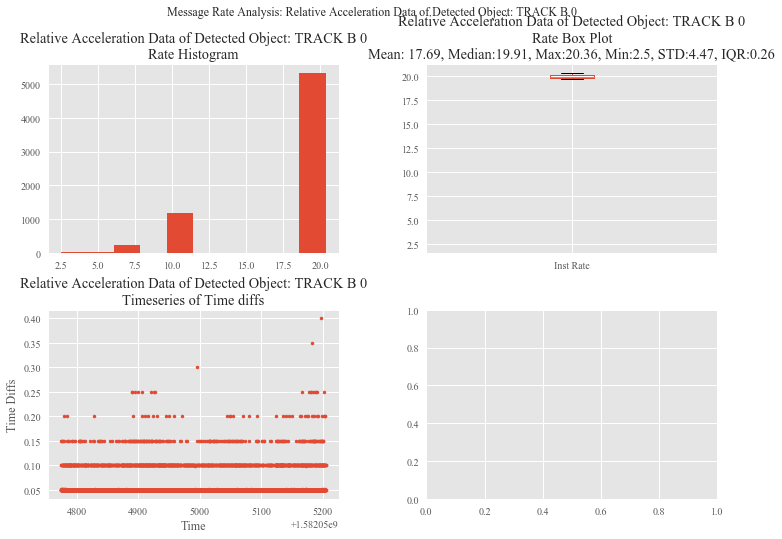

In [14]:
track_id = np.arange(0, 1) # I want to analyze rate for TRACK_B_0 only
rel_accel = r4.ts_rel_accel(track_id)

strym.ranalyze(rel_accel, title='Relative Acceleration Data of Detected Object: TRACK B 0')

### 4. CSV file SPEED, TRACK_A_0 and TRACK_B_0 only

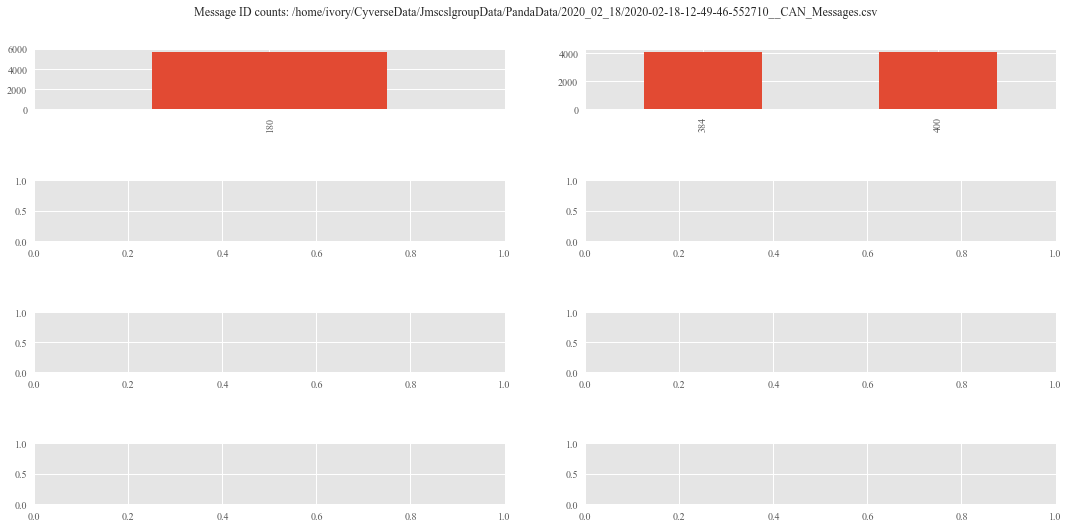

In [15]:
r5 = strymread(csvfile=csvlist[5], dbcfile=dbcfile)
r5.count()

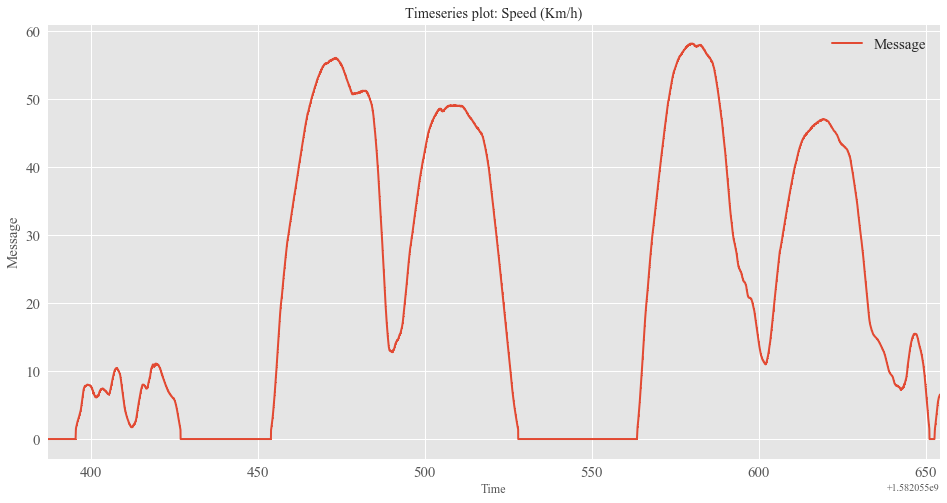

In [16]:
speed = r5.ts_speed()
strym.plt_ts(speed, title="Speed (Km/h)")

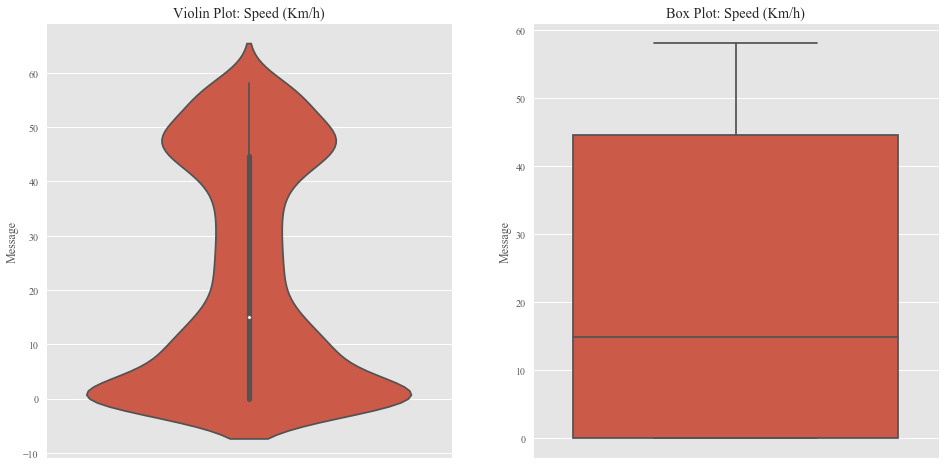

In [17]:
# violin plot of speed data
strym.violinplot(speed["Message"], title="Speed (Km/h)")

Analyzing Timestamp and Data Rate of Speed Data
Interquartile Range of Rate for Speed Data is 33.15132055347023 


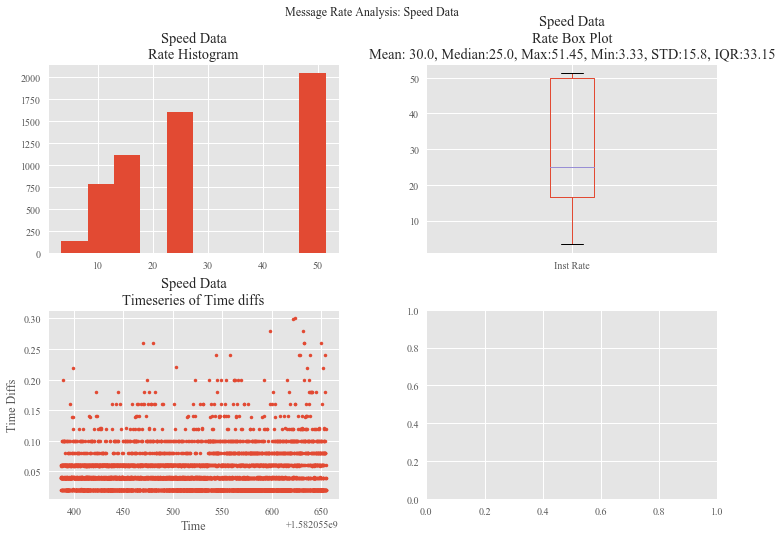

In [18]:
strym.ranalyze(speed, title='Speed Data')

Analyzing Timestamp and Data Rate of Longitudinal Distance Data: TRACK A 0
Interquartile Range of Rate for Longitudinal Distance Data: TRACK A 0 is 0.26723401021257587 


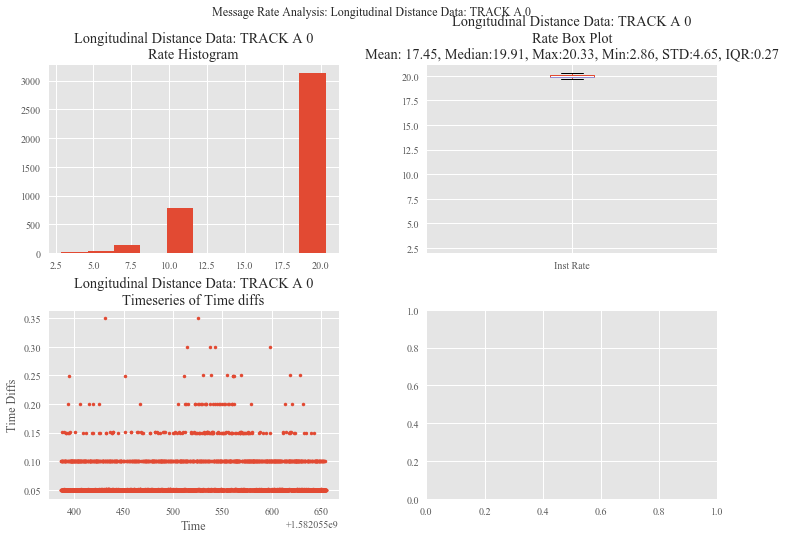

In [19]:
track_id = np.arange(0, 1) # I want to analyze rate for TRACK_A_0 only
long_dist = r5.ts_long_dist(track_id)

strym.ranalyze(long_dist, title='Longitudinal Distance Data: TRACK A 0')

Analyzing Timestamp and Data Rate of Relative Acceleration Data of Detected Object: TRACK B 0
Interquartile Range of Rate for Relative Acceleration Data of Detected Object: TRACK B 0 is 0.2755764028869834 


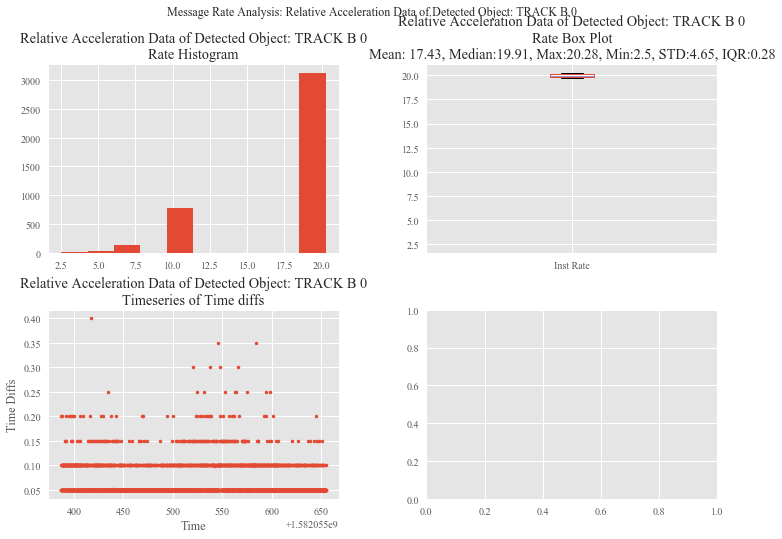

In [20]:
track_id = np.arange(0, 1) # I want to analyze rate for TRACK_B_0 only
rel_accel = r5.ts_rel_accel(track_id)

strym.ranalyze(rel_accel, title='Relative Acceleration Data of Detected Object: TRACK B 0')

TRACK_A_0 and TRACK_B_0 have almost same rate statistics which is not surprising.